# DIP Assignment 4

Arghya Roy (2021115008)


imports


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Task 1

Image Segmentation Using Thresholding


### a

Load a grayscale image and implement the following thresholding methods to segment the image:

- Binary Thresholding
- Adaptive Thresholding
- Otsu’s Thresholding


In [ ]:
lenna = cv2.imread("./images/Lenna.png", cv2.IMREAD_GRAYSCALE)

_, lenna_bin = cv2.threshold(lenna, 127, 255, cv2.THRESH_BINARY)

lenna_ada = cv2.adaptiveThreshold(
    lenna, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2
)

_, lenna_otsu = cv2.threshold(lenna, 0, 255, cv2.THRESH_OTSU)

### b

Display the original and segmented images side by side for comparison, ensuring each method is clearly labeled.


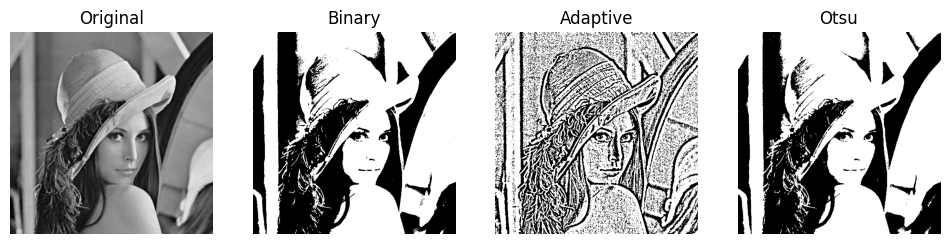

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(141)
plt.imshow(lenna, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(142)
plt.imshow(lenna_bin, cmap="gray")
plt.title("Binary")
plt.axis("off")

plt.subplot(143)
plt.imshow(lenna_ada, cmap="gray")
plt.title("Adaptive")
plt.axis("off")

plt.subplot(144)
plt.imshow(lenna_otsu, cmap="gray")
plt.title("Otsu")
plt.axis("off")

plt.show()

### c

In 2-3 sentences, discuss which method provided the best segmentation for your image and why. Consider factors like clarity of object boundaries and noise levels.


- Binary Thresholding: This method uses a single, globally applied threshold value. All pixels above this value become white, and all below become black. It can work well but depends on the image and the threshold value chosen manually. It is not adaptive to different lighting conditions or noise levels.

- Adaptive Thresholding: It calculates a threshold locally for each pixel based on a neighborhood around it. This accounts for variations in illumination across the image. So, more detail can be preserved in the segmented image. However, as visible, the boundaries are less clear and distinct in places, and the image has a slightly grainy appearance due to the local thresholding process fluctuating across small regions of similar intensity. This granularity reduces the sharpness of the object boundaries. 

- Otus's Thresholding: This method automatically determines the optimal threshold value by maximizing the variance between the foreground and background pixel distributions. It attempts to find the threshold that best separates the object from the background. The Otsu's method achieves a balance between detail preservation and noise reduction. The boundaries are relatively sharp and clean, while maintaining more details in the hair and hat than the binary method. The image appears less noisy than the adaptive method.

So, in conclusion, Otsu's Thresholding seems to provide the best segmentation.




---


## Task 2

Line Detection Using Hough Transform


### a

Write a function to detect and highlight straight lines in an image using the Hough Line Transform. Make sure to use the Canny edge detector to preprocess the image before applying the Hough Transform.


In [ ]:
def detect_straight_lines(img, threshold):
    edges = cv2.Canny(img, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold)

    img_copy = img.copy()

    for line in lines:
        rho, theta = line[0]

        a = np.cos(theta)
        b = np.sin(theta)

        x0 = a * rho
        y0 = b * rho

        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        cv2.line(img_copy, (x1, y1), (x2, y2), (0, 0, 255), 2)

    return img_copy

### b

Test your function on an image with clear straight lines, such as a road, building, or grid structure. Display the original image and the processed image with highlighted lines.


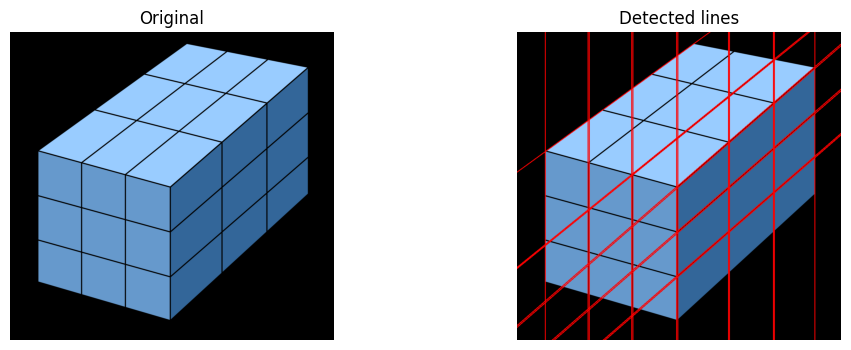

In [ ]:
grid = cv2.imread("./images/grid.png", cv2.IMREAD_COLOR)

grid_lines = detect_straight_lines(grid, 300)

plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.imshow(cv2.cvtColor(grid, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(122)
plt.imshow(cv2.cvtColor(grid_lines, cv2.COLOR_BGR2RGB))
plt.title("Detected lines")
plt.axis("off")

plt.show()

### c

Experiment with different threshold parameters in the Hough Transform to optimize line detection. In 2-3 sentences, describe the parameter changes and how they affected the results.


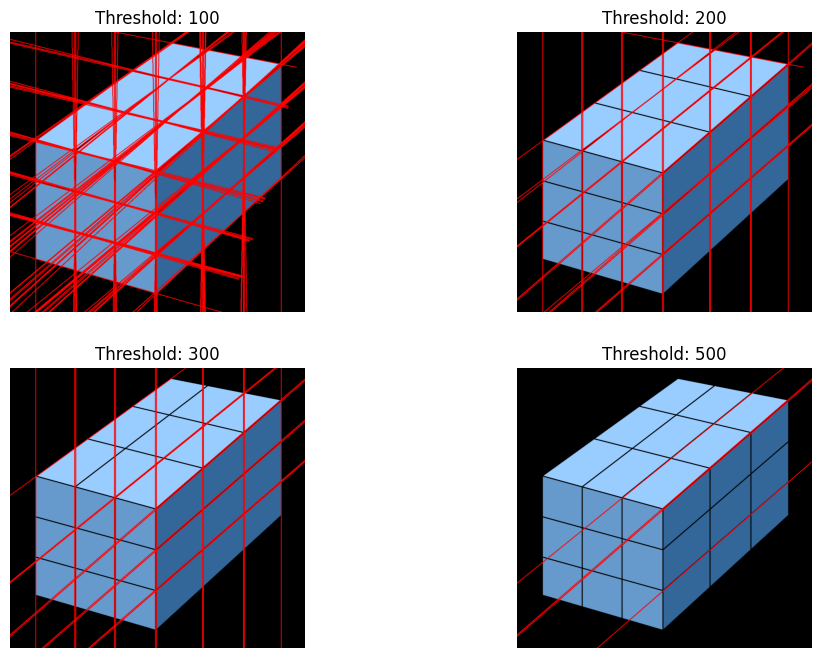

In [ ]:
thresholds = [100, 200, 300, 500]

plt.figure(figsize=(12, 8))

for i, threshold in enumerate(thresholds):
    grid_lines = detect_straight_lines(grid, threshold)

    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(grid_lines, cv2.COLOR_BGR2RGB))
    plt.title(f"Threshold: {threshold}")
    plt.axis("off")

plt.show()

As we can see, the Hough Transform is sensitive to the threshold parameters. A lower threshold value detects more lines, including some false positives, while a higher threshold value detects fewer lines, missing some true positives. So, a higher threshold filters out noise and false positives, but it may also miss some valid lines, while a lower threshold captures more lines but may include more noise and false positives. Therefore, an optimal threshold value should be chosen based on the specific image and the desired balance between sensitivity and specificity.

---


## Task 3

Circle Detection Using Hough Circle Transform


### a

Implement a function to detect circles in an image using the Hough Circle Transform. Use suitable preprocessing steps (e.g., smoothing) to improve detection accuracy


In [2]:
def detect_circles(img, dp, min_dist, param1, param2, min_radius, max_radius):

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.medianBlur(img_gray, 7)

    circles = cv2.HoughCircles(
        img_gray,
        cv2.HOUGH_GRADIENT,
        dp,
        min_dist,
        param1=param1,
        param2=param2,
        minRadius=min_radius,
        maxRadius=max_radius,
    )

    img_copy = img.copy()

    if circles is not None:
        circles = np.uint16(np.around(circles))

        for i in circles[0, :]:
            center = (i[0], i[1])
            radius = i[2]

            cv2.circle(img_copy, center, radius, (0, 255, 0), 10)

    return img_copy

### b

Apply your function to an image with circular objects (e.g., coins, wheels, or round signs). Display the original image and the processed image with detected circles overlaid.

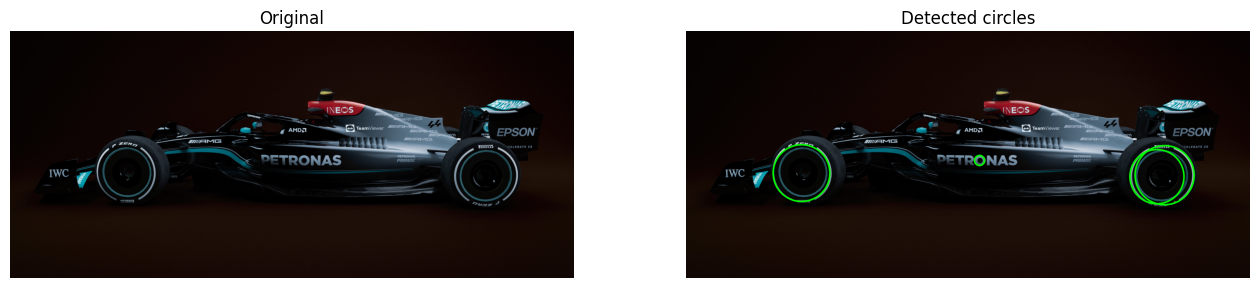

In [4]:
ham = cv2.imread("./images/merc44.jpg", cv2.IMREAD_COLOR)

ham_with_circles = detect_circles(ham, 1, 50, 100, 100, 0, 0)

plt.figure(figsize=(16, 8))

plt.subplot(121)
plt.imshow(cv2.cvtColor(ham, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(122)
plt.imshow(cv2.cvtColor(ham_with_circles, cv2.COLOR_BGR2RGB))
plt.title("Detected circles")
plt.axis("off")

plt.show()

### c

Experiment with different radius ranges and accumulator thresholds. Display the results with and without these adjustments, and briefly explain any improvements observed. 

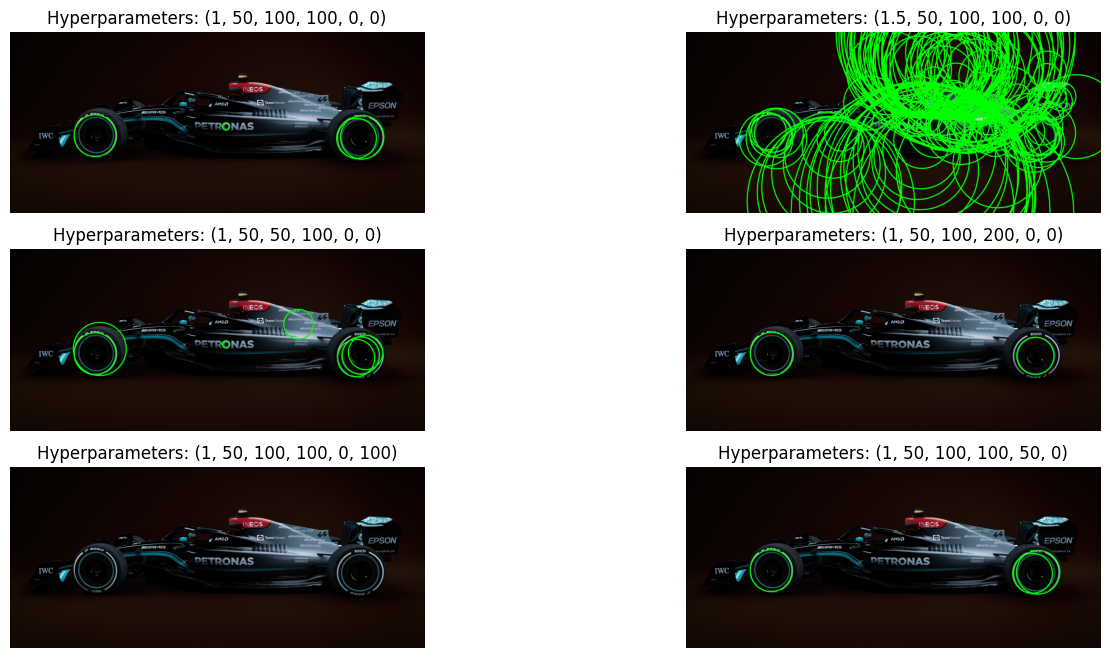

In [ ]:
hyperparameters = [
    (1, 50, 100, 100, 0, 0),
    (1.5, 50, 100, 100, 0, 0),
    (1, 50, 50, 100, 0, 0),
    (1, 50, 100, 200, 0, 0),
    (1, 50, 100, 100, 0, 100),
    (1, 50, 100, 100, 50, 0),
]

plt.figure(figsize=(16, 8))

for i, hyperparameter in enumerate(hyperparameters):
    ham_with_circles = detect_circles(ham, *hyperparameter)

    plt.subplot(3, 2, i + 1)
    plt.imshow(cv2.cvtColor(ham_with_circles, cv2.COLOR_BGR2RGB))
    plt.title(f"Hyperparameters: {hyperparameter}")
    plt.axis("off")

plt.show()


- $(1, 50, 100, 100, 0, 0)$: The circles detected seem reasonable, but some smaller or faint circles might be missed due to the lack of constraints on radius.
- $(1.5, 50, 100, 100, 0, 0)$: Increasing `dp` introduces artifacts, with many overlapping or incorrect circles. It indicates a trade-off between computational efficiency and accuracy.
- $(1, 50, 50, 100, 0, 0)$: Lowering `param1` results in detecting faint edges, introducing some false positives.
- $(1, 50, 100, 200, 0, 0)$: Increasing `param2` eliminates most false positives but may also miss faint circles due to stricter thresholds.
- $(1, 50, 100, 100, 0, 100)$: Adding a `max_radius` constraint helps focus on larger circles, improving detection specificity for objects of similar size.
- $(1, 50, 100, 100, 50, 0)$: Adding a `min_radius` constraint avoids detecting tiny circles, improving the detection quality.

General observations:
- Broad radius ranges result in cluttered and noisy outputs. Narrowing the range by adding constraints improves detection accuracy and focuses on circles of interest.
- Low accumulator thresholds increase sensitivity but lead to more false positives. Higher thresholds reduce sensitivity but provide cleaner and more accurate detections.



---

## Task 4

Harris Corner Detection

### a

Create a function to detect and mark corners in an image using the Harris Corner Detection method. Use an appropriate method to mark the detected corners on the original image. 

In [12]:
def detect_corners(img, block_size, ksize, k):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = np.float32(img_gray)

    corners = cv2.cornerHarris(img_gray, block_size, ksize, k)

    # dilating the corners to make the marks thicker
    corners = cv2.dilate(corners, None)
    corners = cv2.dilate(corners, None)

    img_copy = img.copy()

    img_copy[corners > 0.01 * corners.max()] = [0, 0, 255]

    return img_copy

### b

Apply your function to an image with distinct corners, such as a chessboard or a building with strong edges and corners. Display the original and processed images with corners marked.

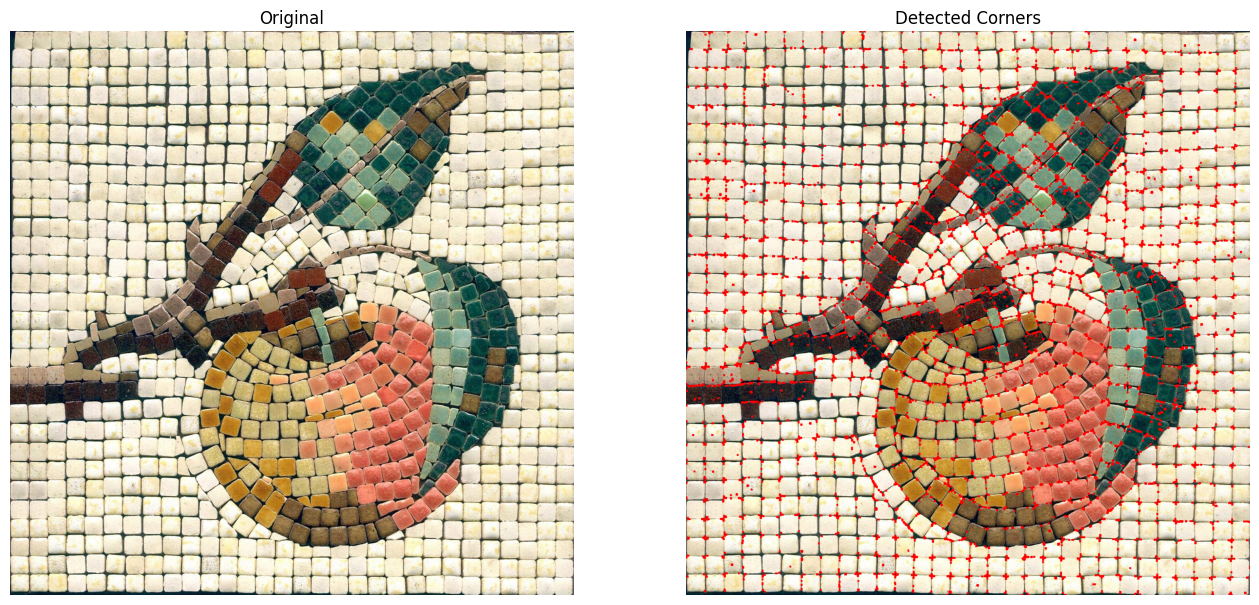

In [14]:
mosaic = cv2.imread("./images/mosaic.jpg", cv2.IMREAD_COLOR)

marked_mosaic = detect_corners(mosaic, block_size=2, ksize=3, k=0.04)

plt.figure(figsize=(16, 8))

plt.subplot(121)
plt.imshow(cv2.cvtColor(mosaic, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(122)
plt.imshow(cv2.cvtColor(marked_mosaic, cv2.COLOR_BGR2RGB))
plt.title("Detected Corners")
plt.axis("off")

plt.show()


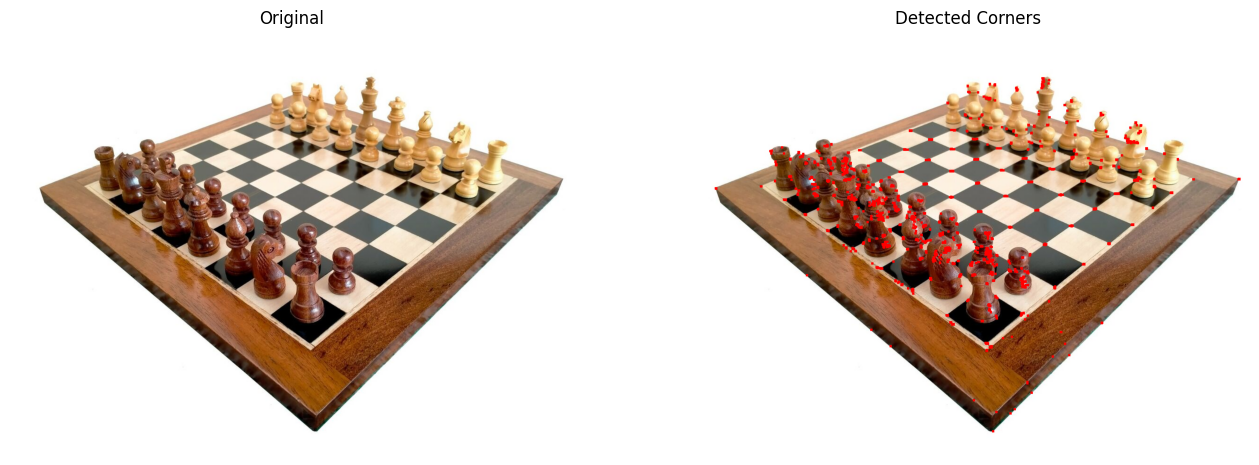

In [16]:
chessboard = cv2.imread("./images/chessboard.jpg", cv2.IMREAD_COLOR)

marked_chessboard = detect_corners(chessboard, block_size=2, ksize=3, k=0.04)

plt.figure(figsize=(16, 8))

plt.subplot(121)
plt.imshow(cv2.cvtColor(chessboard, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(122)
plt.imshow(cv2.cvtColor(marked_chessboard, cv2.COLOR_BGR2RGB))
plt.title("Detected Corners")
plt.axis("off")

plt.show()

### c

Vary the sensitivity parameter (typically called k) in the Harris Corner Detection function. Observe how it affects corner detection, showing both original and altered results. Briefly explain your findings in 2-3 sentences

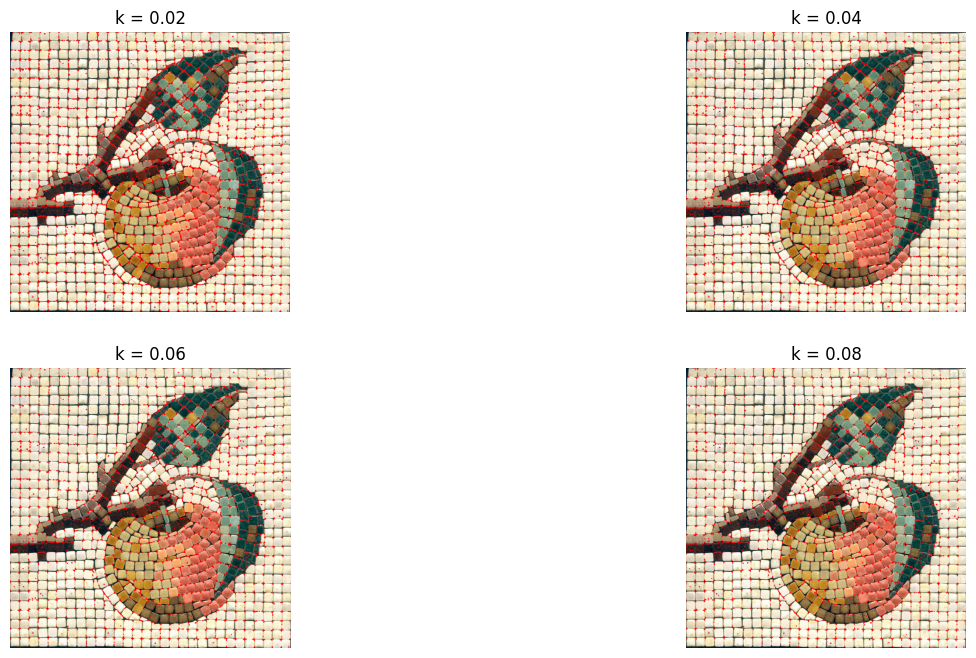

In [22]:

k_values = [0.02, 0.04, 0.06, 0.08]

plt.figure(figsize=(16, 8))

for i, k in enumerate(k_values):
    marked_mosaic = detect_corners(mosaic, block_size=2, ksize=3, k=k)

    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(marked_mosaic, cv2.COLOR_BGR2RGB))
    plt.title(f"k = {k}")
    plt.axis("off")

plt.show()

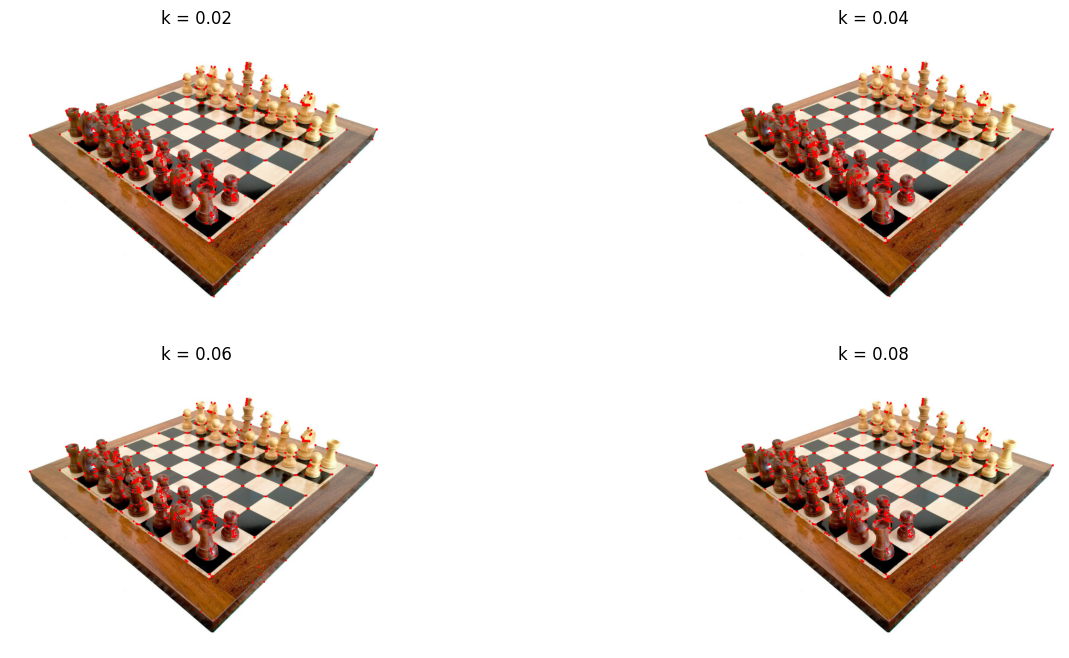

In [21]:

k_values = [0.02, 0.04, 0.06, 0.08]

plt.figure(figsize=(16, 8))

for i, k in enumerate(k_values):
    marked_chessboard = detect_corners(chessboard, block_size=2, ksize=3, k=k)

    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(marked_chessboard, cv2.COLOR_BGR2RGB))
    plt.title(f"k = {k}")
    plt.axis("off")

plt.show()


As we can see, a higher `k` value emphasizes corners with stronger gradients, making them more prominent in the output. Conversely, a lower `k` value detects corners with weaker gradients, which may include more false positives or less distinct corners. Therefore, the choice of `k` should be based on the image characteristics and the desired balance between sensitivity and specificity in corner detection.

---

## Task 5

Short Theory

### Question

In 100-150 words, explain how the **Hough Transform** differs when detecting lines versus circles in an image. Discuss how parameter space and computational complexity vary between these applications.

#### Answer

The Hough Transform detects lines and circles using different parameter spaces. For lines, it maps points to a 2D parameter space, typically using polar coordinates $(\rho, \theta)$, where $\rho$ is the perpendicular distance from the origin to the line, and $\theta$ is the angle of the line. For circles, a 3D parameter space $(a, b, r)$ is used, where $(a, b)$ represents the circle’s center and $r$ its radius.  

Detecting lines is computationally simpler because it requires searching a 2D space, whereas circles involve a more complex 3D search, especially when the radius is unknown. Optimizations like fixing $r$ or using gradient information can reduce complexity. Consequently, line detection is faster and less memory-intensive compared to circle detection, which requires more storage and computational resources to handle the additional parameter.

---